# Case Study : Fake News Detection

In [114]:
# import the libraries
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [104]:
df = pd.read_csv("news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [106]:
df.text[1], df.label[1]

('Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two fundamental truths in this world: Paul Ryan desperately wants to be president. And Paul Ryan will never be president. Today proved it. \nIn a particularly staggering example of political cowardice, Paul Ryan re-re-re-reversed course and announced that he was back on the Trump Train after all. This was an aboutface from where he was a few weeks ago. He had previously declared he would not be supporting or defending Trump after a tape was made public in which Trump bragged about assaulting women. Suddenly, Ryan was appearing at a pro-Trump rally and boldly declaring that he already sent in his vote to make him President of the United States. It was a surreal moment. The figurehead of the Republican Party dosed himself in gasoline, got up on a stage on a chilly afternoon in Wisconsin, and lit a match. . @SpeakerRyan says he voted for @realDonaldTrump : “Republicans, it is time to come home” h

In [7]:
# removing ""unnamed: 0"" column

df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [9]:
df.shape

(6335, 3)

In [10]:
df.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [15]:
df.label.unique()

array(['FAKE', 'REAL'], dtype=object)

<Axes: >

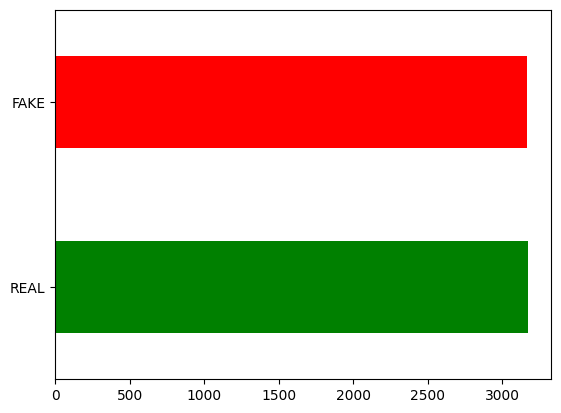

In [20]:
df.label.value_counts().plot.barh(color=["g","r"])

In [ ]:
# Splitting the data set into train and test split

In [25]:
Y = df.label
X = df["text"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=102)

In [30]:
X_train

6230    The Bible offers up some really good advice as...
1649    By Warren Woodward Everyone knows that wireles...
2005    Who's Winning The 2016 Race — On Facebook And ...
3754    Thanks to the intelligent use of technology, t...
3056    As Democratic presidential candidates begin to...
                              ...                        
2882    2 Reminders to Ignore the "Trump is Doomed" Po...
4975    Home › POLITICS › BECK: COMEY LETTER ‘ONE OF T...
2290    Backdoor Survival October 29, 2016 \nThe topic...
4851    Senate majority leader Mitch McConnell thought...
2304    Republican Pat McCrory is trailing in a tight ...
Name: text, Length: 5068, dtype: object

In [67]:
# Now converting the text into the tokens to analysis
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)

In [119]:
# initialize the passive aggressive classifier
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(max_iter=50, early_stopping=True,)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(early_stopping=True, max_iter=50)

In [120]:
# evaluating the model
y_pred = pac.predict(tfidf_test)


# Accuracy score
score = accuracy_score(y_test, y_pred)
print(f"Accuracy : {round(score*100,2) }%")

Accuracy : 93.76%


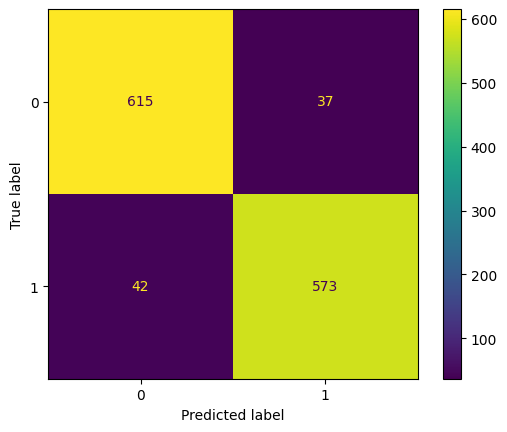

In [122]:
# Evaluating model using confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["FAKE","REAL"])
ConfusionMatrixDisplay(cm).plot()

In [93]:
# saving this model
import pickle

pac_model = pickle.dump(pac, open("pac_model.pkl", "wb"))

In [101]:
pac = pickle.load(open("pac_model.pkl","rb"))